# Imports

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Curation

## Curation: Components file

In [2]:
# Reading CSV file
components_df = pd.read_csv("datasets/Components_by_feb20.csv", header=0)


# Showing first records
components_df.head(10)

,Symbol,Name,Market Cap,Last Sale,Net Change,Percentage Change
0,AAPL,Apple Inc. Common Stock,"3,678,455,015,510",$244.87,$0.40,0.16%
1,ABNB,"Airbnb, Inc. Class A Common Stock","99,612,645,850",$157.98,$2.62,-1.63%
2,ADBE,Adobe Inc. Common Stock,"198,927,747,000",$456.99,$7.12,-1.53%
3,ADI,"Analog Devices, Inc. Common Stock","119,935,097,738",$241.66,$21.44,9.74%
4,ADP,"Automatic Data Processing, Inc. Common Stock","127,440,101,105",$313.22,$3.27,1.06%
5,ADSK,"Autodesk, Inc. Common Stock","64,297,900,000",$299.06,$3.40,1.15%
6,AEP,"American Electric Power Company, Inc. Common S...","54,937,456,339",$103.09,$0.89,0.87%
7,AMAT,"Applied Materials, Inc. Common Stock","141,197,110,477",$174.06,$2.06,1.20%
8,AMD,"Advanced Micro Devices, Inc. Common Stock","185,852,617,462",$114.69,$0.41,0.36%
9,AMGN,Amgen Inc. Common Stock,"158,083,298,577",$294.27,$1.47,0.50%


In [3]:
# Exploring structure
print(components_df.dtypes)

Symbol               object
Name                 object
Market Cap           object
Last Sale            object
Net Change           object
Percentage Change    object
dtype: object


In [4]:
# Curation Steps
# Step 1: Renaming
name_mapping = {
    "Symbol	Name": "symbol_name",
    "Market Cap": "market_cap",
    "Last Sale": "last_sale",
    "Net Change": "net_change",
    "Percentage Change": "percentage_change"
}
components_df.rename(columns=name_mapping, inplace=True)

# Step 2: Impute missing values with the median
components_df.dropna()

# Showing resulted data
components_df.head(5)

,Symbol,Name,market_cap,last_sale,net_change,percentage_change
0,AAPL,Apple Inc. Common Stock,"3,678,455,015,510",$244.87,$0.40,0.16%
1,ABNB,"Airbnb, Inc. Class A Common Stock","99,612,645,850",$157.98,$2.62,-1.63%
2,ADBE,Adobe Inc. Common Stock,"198,927,747,000",$456.99,$7.12,-1.53%
3,ADI,"Analog Devices, Inc. Common Stock","119,935,097,738",$241.66,$21.44,9.74%
4,ADP,"Automatic Data Processing, Inc. Common Stock","127,440,101,105",$313.22,$3.27,1.06%


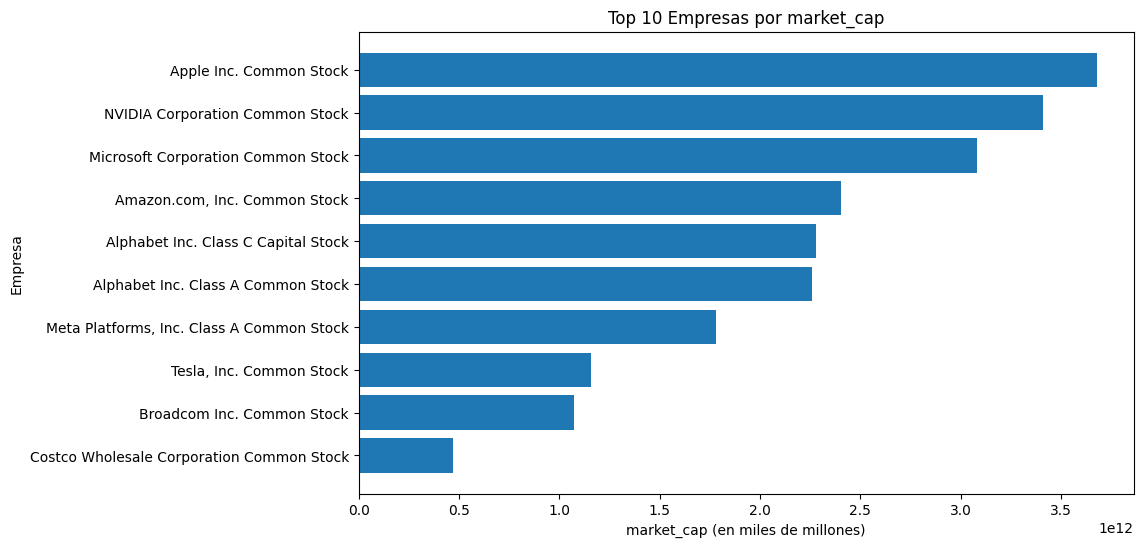

In [5]:
# Convert the 'market_cap' column to numeric (removing commas and other non-numeric characters if necessary)
components_df['market_cap'] = components_df['market_cap'].replace('[\$,]', '', regex=True).astype(float)

# Get the top 10 according to the 'market_cap' column
top_10 = components_df.nlargest(10, 'market_cap')

# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10["Name"], top_10["market_cap"])
plt.xlabel("market_cap (en miles de millones)")
plt.ylabel("Empresa")
plt.title("Top 10 Empresas por market_cap")
plt.gca().invert_yaxis()  # Invert the Y axis so that the largest is on top
plt.show()

El Market Cap, el valor que nos índica en qué posición se encuentran cada uno de los componentes del índice.

In [6]:
# Write cleaned data
components_df.to_csv('curated_data/components.csv', index=False)

## Curation: NASDAQ 100 historical data

In [7]:
# Read CSV file
df_nasdaq_raw = pd.read_csv("datasets/HistoricalData_nasdaq_5y.csv", header=0)

# Show first records
df_nasdaq_raw.head(10)

,Date,Close/Last,Open,High,Low
0,02/18/2025,22164.61,22176.01,22191.37,22029.58
1,02/14/2025,22114.69,22038.61,22139.43,22010.35
2,02/13/2025,22030.71,21786.16,22038.15,21758.04
3,02/12/2025,21719.26,21475.41,21745.66,21454.19
4,02/11/2025,21693.52,21629.11,21776.25,21625.51
5,02/10/2025,21756.73,21670.06,21793.13,21645.17
6,02/07/2025,21491.31,21776.28,21869.32,21465.46
7,02/06/2025,21774.07,21674.17,21776.08,21618.25
8,02/05/2025,21658.16,21453.87,21662.98,21408.64
9,02/04/2025,21566.92,21319.58,21582.40,21308.24


In [8]:
# Getting schema
print(df_nasdaq_raw.dtypes)

Date           object
Close/Last    float64
Open          float64
High          float64
Low           float64
dtype: object


In [9]:
# Curation steps
# Step 1: Renaming
name_mapping = {
    "Date": "date",
    "Close/Last": "close_price",
    "Open": "open",
    "High": "high",
    "Low": "low"
}
df_nasdaq = df_nasdaq_raw.rename(columns=name_mapping, inplace=False)

# Step 2: Impute missing values with the median
df_nasdaq ['close_price'] = df_nasdaq ['close_price'].fillna(df_nasdaq ['close_price'].median())

# Step 3: Detect outliers using the IQR method
Q1 = df_nasdaq ['close_price'].quantile(0.25)
Q3 = df_nasdaq ['close_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Cap values outside the bounds
df_nasdaq ['price_clipped'] = df_nasdaq['close_price'].clip(lower_bound, upper_bound)

print(df_nasdaq)

            date  close_price      open      high       low  price_clipped
0     02/18/2025     22164.61  22176.01  22191.37  22029.58       22164.61
1     02/14/2025     22114.69  22038.61  22139.43  22010.35       22114.69
2     02/13/2025     22030.71  21786.16  22038.15  21758.04       22030.71
3     02/12/2025     21719.26  21475.41  21745.66  21454.19       21719.26
4     02/11/2025     21693.52  21629.11  21776.25  21625.51       21693.52
...          ...          ...       ...       ...       ...            ...
1252  02/25/2020      8834.87   9167.33   9183.78   8807.11        8834.87
1253  02/24/2020      9079.63   9055.30   9194.91   9028.87        9079.63
1254  02/21/2020      9446.69   9582.54   9594.00   9406.38        9446.69
1255  02/20/2020      9627.83   9696.66   9714.23   9513.23        9627.83
1256  02/19/2020      9718.73   9683.94   9736.57   9676.07        9718.73

[1257 rows x 6 columns]


In [10]:
# Change date format
df_nasdaq['date'] = pd.to_datetime(df_nasdaq['date'], format="%m/%d/%Y")
df_nasdaq = df_nasdaq.sort_values('date')
df_nasdaq = df_nasdaq.reset_index(drop=True)

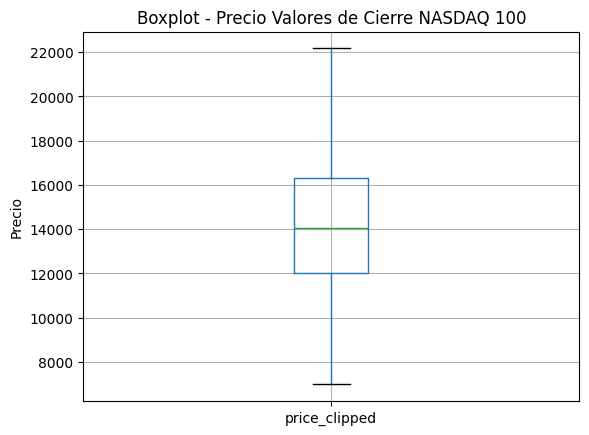

In [11]:
# Get Bloxplot chart
df_nasdaq.boxplot(column='price_clipped')
plt.title('Boxplot - Precio Valores de Cierre NASDAQ 100')
plt.ylabel('Precio')
plt.show()

In [12]:
# Change data types 
df_nasdaq['close_price'] = df_nasdaq['close_price'].astype(float)
df_nasdaq['open'] = df_nasdaq['open'].astype(float)
df_nasdaq['high'] = df_nasdaq['high'].astype(float)
df_nasdaq['low'] = df_nasdaq['low'].astype(float)

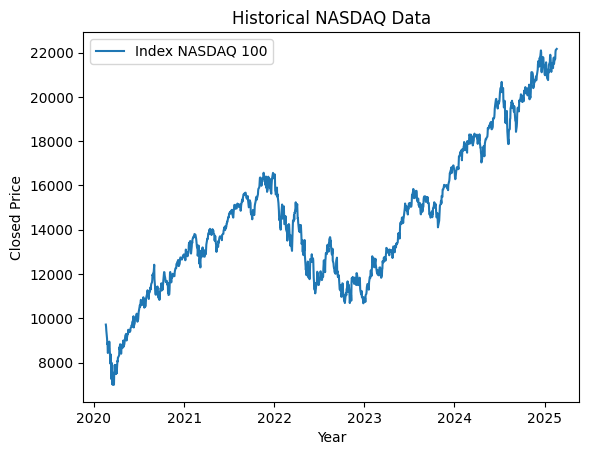

In [13]:
# Historical NASDAQ Data Chart
plt.plot(df_nasdaq['date'], df_nasdaq['close_price'], label=f'Index NASDAQ 100')
plt.xlabel('Year')
plt.ylabel('Closed Price')
plt.title('Historical NASDAQ Data')
plt.legend()
plt.show()

In [14]:
#Write cleaned data
df_nasdaq.to_csv('curated_data/nasdaq_historical.csv', index=False)


## Curation: Top 5 stocks files

In [15]:
# Read all 5 csv files

apple_stock_df = pd.read_csv("datasets/HistoricalData_apple_5y.csv", header=0)
apple_stock_df = apple_stock_df .sort_values("Date")
apple_stock_df["stock_name"] = 'Apple Inc'

nvidia_stock_df = pd.read_csv("datasets/HistoricalData_nvidia_5y.csv", header=0)
nvidia_stock_df = nvidia_stock_df.sort_values("Date")
nvidia_stock_df["stock_name"] = 'NVIDIA Corp'

msft_stock_df = pd.read_csv("datasets/HistoricalData_msft_5y.csv", header=0)
msft_stock_df = msft_stock_df.sort_values("Date")
msft_stock_df["stock_name"] = 'Microsoft Corp'

amazon_stock_df= pd.read_csv("datasets/HistoricalData_amazon_5y.csv", header=0)
amazon_stock_df = amazon_stock_df.sort_values("Date")
amazon_stock_df["stock_name"] = 'Amazon.com'

goog_stock_df = pd.read_csv("datasets/HistoricalData_goog_5y.csv", header=0)
goog_stock_df = goog_stock_df.sort_values("Date")
goog_stock_df["stock_name"] = 'Alphabet Inc'

top_five_historical = [apple_stock_df, nvidia_stock_df, msft_stock_df, amazon_stock_df, goog_stock_df ]
# Concatenate all the dfs
df_top_historical = pd.concat(top_five_historical, ignore_index=True)


In [16]:
df_top_historical.head(20)

,Date,Close/Last,Volume,Open,High,Low,stock_name
0,01/02/2024,$185.64,82488670,$187.15,$188.44,$183.885,Apple Inc
1,01/02/2025,$243.85,55740730,$248.93,$249.10,$241.8201,Apple Inc
2,01/03/2022,$182.01,104701200,$177.83,$182.88,$177.71,Apple Inc
3,01/03/2023,$125.07,112117500,$130.28,$130.90,$124.17,Apple Inc
4,01/03/2024,$184.25,58414460,$184.22,$185.88,$183.43,Apple Inc
5,01/03/2025,$243.36,40244110,$243.36,$244.18,$241.89,Apple Inc
6,01/04/2021,$129.41,143301900,$133.52,$133.6116,$126.76,Apple Inc
7,01/04/2022,$179.70,99310440,$182.63,$182.94,$179.12,Apple Inc
8,01/04/2023,$126.36,89113630,$126.89,$128.6557,$125.08,Apple Inc
9,01/04/2024,$181.91,71983570,$182.15,$183.0872,$180.88,Apple Inc


In [17]:
# Create a df copy  and change date format
df_historical = df_top_historical.copy()
df_historical['Date'] = pd.to_datetime(df_historical['Date'], format="%m/%d/%Y")
df_historical = df_historical.sort_values('Date')
df_historical = df_historical.reset_index(drop=True)

In [18]:
# Change data types
df_historical['Close/Last'] = df_historical['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df_historical['Volume'] = df_historical['Volume'].replace('[\$,]', '', regex=True).astype(int)
df_historical['Open'] = df_historical['Open'].replace('[\$,]', '', regex=True).astype(float)
df_historical['High'] = df_historical['High'].replace('[\$,]', '', regex=True).astype(float)
df_historical['Low'] = df_historical['Low'].replace('[\$,]', '', regex=True).astype(float)

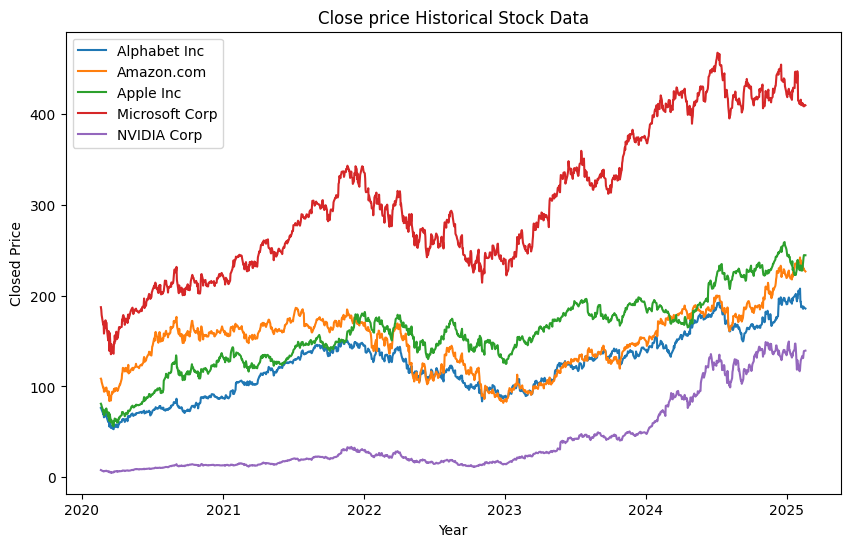

In [19]:
# Historical Stock Data Chart
plt.figure(figsize=(10, 6))
for company, data in df_historical.groupby('stock_name'):
    plt.plot(data['Date'], data['Close/Last'], label=f'{company}')

plt.xlabel('Year')
plt.ylabel('Closed Price')
plt.title('Close price Historical Stock Data')
plt.legend()
plt.show()
   

In [20]:
df_historical.head(5)

,Date,Close/Last,Volume,Open,High,Low,stock_name
0,2020-02-19,80.9050,93983960,80.0000,81.1425,80.0000,Apple Inc
1,2020-02-19,76.3345,18985360,76.2535,76.6053,76.0700,Alphabet Inc
2,2020-02-19,187.2800,29997470,188.0600,188.1800,186.4700,Microsoft Corp
3,2020-02-19,7.8675,694331200,7.5373,7.8853,7.5371,NVIDIA Corp
4,2020-02-19,108.5110,51223300,108.3900,109.2550,108.0560,Amazon.com


In [21]:
#Curation Steps
# Step 1: Renaming
name_mapping = {
    "Date": "date",
    "Close/Last": "close_price",
    "Volume": "volume",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "stock_name": "stock_name"
}
df_historical.rename(columns=name_mapping, inplace=True)

# Step 2: Impute missing values with the median
df_historical['close_price'] = df_historical['close_price'].fillna(df_historical['close_price'].median())

# Step 3: Detect outliers using the IQR method
Q1 = df_historical['close_price'].quantile(0.25)
Q3 = df_historical['close_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Cap values outside the bounds
df_historical['price_clipped'] = df_historical['close_price'].clip(lower_bound, upper_bound)

print(df_historical)


           date  close_price     volume      open      high       low  \
0    2020-02-19      80.9050   93983960   80.0000   81.1425   80.0000   
1    2020-02-19      76.3345   18985360   76.2535   76.6053   76.0700   
2    2020-02-19     187.2800   29997470  188.0600  188.1800  186.4700   
3    2020-02-19       7.8675  694331200    7.5373    7.8853    7.5371   
4    2020-02-19     108.5110   51223300  108.3900  109.2550  108.0560   
...         ...          ...        ...       ...       ...       ...   
6280 2025-02-18     244.4700   48822490  244.1500  245.1800  241.8400   
6281 2025-02-18     409.6400   21423050  408.0000  410.5970  406.5000   
6282 2025-02-18     139.4000  219176600  141.2700  143.4400  137.9250   
6283 2025-02-18     185.8000   19796030  187.4400  187.7800  183.5800   
6284 2025-02-18     226.6500   42975130  228.8200  229.3000  223.7200   

          stock_name  price_clipped  
0          Apple Inc        80.9050  
1       Alphabet Inc        76.3345  
2     Mic

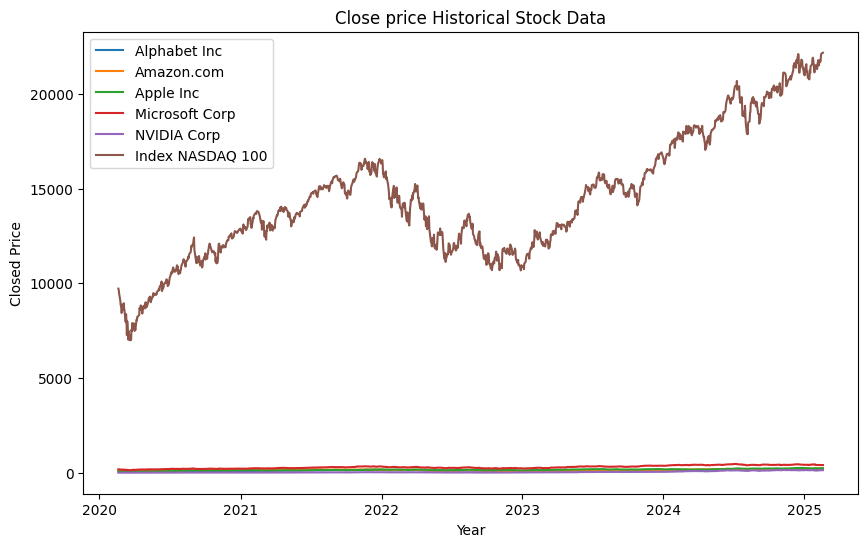

In [22]:
# Historical Stock Data Chart and NASDAQ index
plt.figure(figsize=(10, 6))
for company, data in df_historical.groupby('stock_name'):
    plt.plot(data['date'], data['close_price'], label=f'{company}')
plt.plot(df_nasdaq['date'], df_nasdaq['close_price'], label=f'Index NASDAQ 100')
plt.xlabel('Year')
plt.ylabel('Closed Price')
plt.title('Close price Historical Stock Data')
plt.legend()
plt.show()
   

## Analisis de volumen

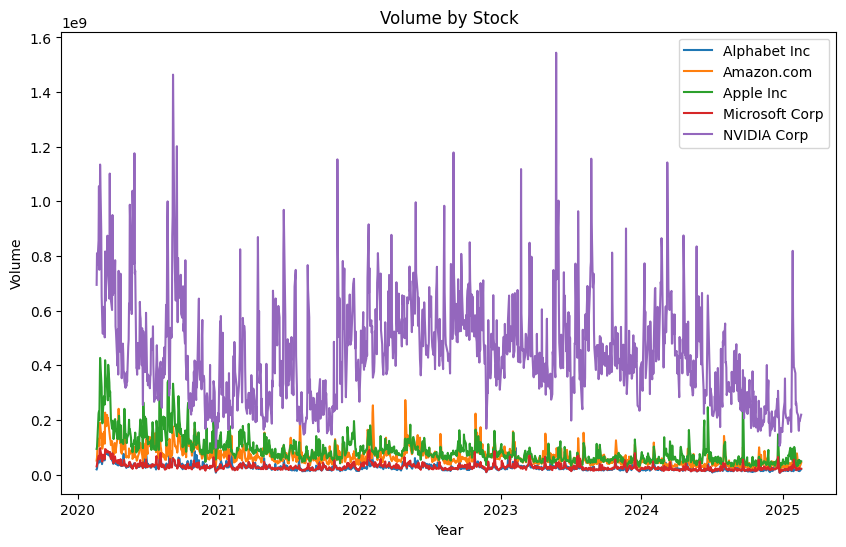

In [23]:
# Stock Data chart by volume of every stock
plt.figure(figsize=(10, 6))
for company, data in df_historical.groupby('stock_name'):
    plt.plot(data['date'], data['volume'], label=f'{company}')

plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume by Stock')
plt.legend()
plt.show()
   

<Figure size 800x600 with 0 Axes>

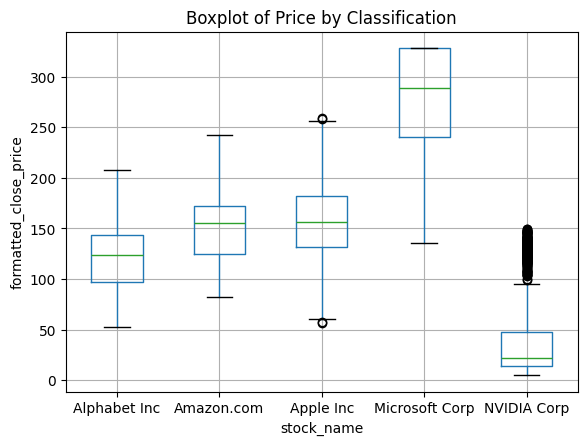

In [27]:
# Boxplot of Price by Stock
plt.figure(figsize=(8,6))
df_historical.boxplot(column='price_clipped', by='stock_name')
plt.title('Boxplot of Price by Stock')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('stock_name')
plt.ylabel('formatted_close_price')
plt.show()

<Figure size 800x600 with 0 Axes>

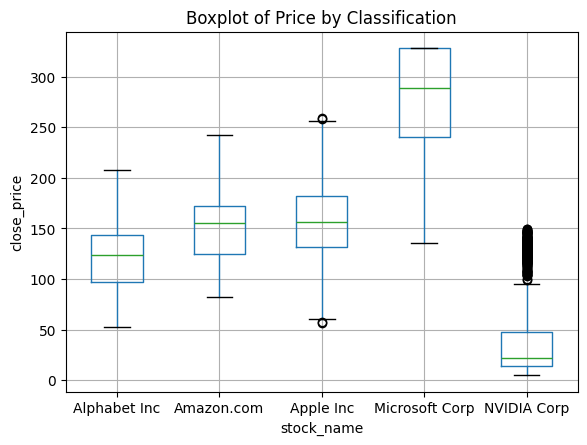

In [28]:
# Boxplot of Price by Stock
plt.figure(figsize=(8,6))
df_historical.boxplot(column='price_clipped', by='stock_name')
plt.title('Boxplot of Price by Classification')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('stock_name')
plt.ylabel('close_price')
plt.show()

En el siguiente gráfico podemos obser que los precios de las acciones de las diferentes compañias se encuentran dentro de un rango en el que han oscilado a través del tiempo, sin embargo NVIDIA cuenta con valores fuera de este rango, pues en los último años ha tenido una tendencia a la alta. 

In [29]:
# Calculate Market Cap
df_historical['market_cap'] = df_historical['close_price'] * df_historical['volume']

In [30]:
# Write cleaned data
df_historical.to_csv('curated_data/top5_historical.csv', index=False)